# Análise dados eleitoras Estado  da Bahia

  ### Objetivos: Entender a distibuicao racial, etária e de genero dos candidatos ao cargo de verador por partido e território
  ### Dados: http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import numpy as np


py.init_notebook_mode(connected=True)

%matplotlib inline

In [2]:
# Definindo casas decimais
decimais = 1

In [3]:
consulta = pd.read_csv('consulta_cand_2016_BA.csv', sep=';', encoding='latin-1', low_memory=False)

In [4]:
consulta2016 = pd.DataFrame(consulta, columns= ['DS_CARGO','NM_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NM_PARTIDO','DS_GENERO',
                                                'DS_COR_RACA', 'NR_IDADE_DATA_POSSE', 'DS_GRAU_INSTRUCAO','NM_UE', 'VR_DESPESA_MAX_CAMPANHA'])

In [5]:
consulta_Vereador_2016 = consulta2016.loc[consulta['DS_CARGO'] == 'VEREADOR']

In [6]:
# Renomeando a coluna raça para os declarados pretos e pardos
for (row, col) in consulta_Vereador_2016.iterrows():
    if col.DS_COR_RACA == 'PRETA':
        consulta_Vereador_2016['DS_COR_RACA'].replace(to_replace=col.DS_COR_RACA, value='NEGRA', inplace=True)
    if col.DS_COR_RACA == 'PARDA':
        consulta_Vereador_2016['DS_COR_RACA'].replace(to_replace=col.DS_COR_RACA, value='NEGRA', inplace=True)

In [97]:
consulta_Vereador_2016.to_csv('consulta_Vereador_2016_BA.csv')

### Visão Geral

Há 33894 candidaturas ao cargo de vereador,33 partidos e 417 unidades eleitorais.

O partido com maior número de candidaturas na Bahia é o PARTIDO SOCIAL DEMOCRÁTICO, já o PARTIDO DA CAUSA OPERÁRIA tem o menor número de candidaturas. 

Salvador é a unidade eleitoral com maior número de candidaturas, 1056, ao contrário de PINTADAS que possui apenas 22 candidaturas.

 68% das candidaturas são de homens, 81% são de declarados negros,  média de idade é de 44 anos e maioria dos candidatos tem  o ensino médio completo
 
 
 
 
 
 
 
 
 
 
 ***OBS:*** *A análise de raça foi feita a partir do que é entendido como população negra no Brasil por parte das instituições Data Labe e Alma Preta, assim foi considerados negros a soma de pretos e pardos*


In [7]:
consulta_Vereador_2016.nunique()

DS_CARGO                       1
NM_CANDIDATO               33894
NM_SOCIAL_CANDIDATO            1
NM_PARTIDO                    33
DS_GENERO                      2
DS_COR_RACA                    4
NR_IDADE_DATA_POSSE           73
DS_GRAU_INSTRUCAO              7
NM_UE                        417
VR_DESPESA_MAX_CAMPANHA        2
dtype: int64

In [8]:
consulta_Vereador_2016['NM_PARTIDO'].value_counts()

PARTIDO SOCIAL DEMOCRÁTICO                        2777
PARTIDO PROGRESSISTA                              2210
PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO       2136
PARTIDO DOS TRABALHADORES                         1998
DEMOCRATAS                                        1895
PARTIDO SOCIALISTA BRASILEIRO                     1627
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA           1591
PARTIDO COMUNISTA DO BRASIL                       1590
PARTIDO DEMOCRÁTICO TRABALHISTA                   1516
PARTIDO REPUBLICANO BRASILEIRO                    1448
PARTIDO SOCIAL CRISTÃO                            1391
PARTIDO SOCIAL LIBERAL                            1349
PARTIDO DA REPÚBLICA                              1256
PARTIDO TRABALHISTA NACIONAL                      1166
PARTIDO TRABALHISTA CRISTÃO                        991
PARTIDO TRABALHISTA BRASILEIRO                     948
SOLIDARIEDADE                                      930
PARTIDO POPULAR SOCIALISTA                         917
PARTIDO VE

<AxesSubplot:title={'center':'DISTRIBUIÇÃO DE CANDIDATURAS POR PARTIDO'}>

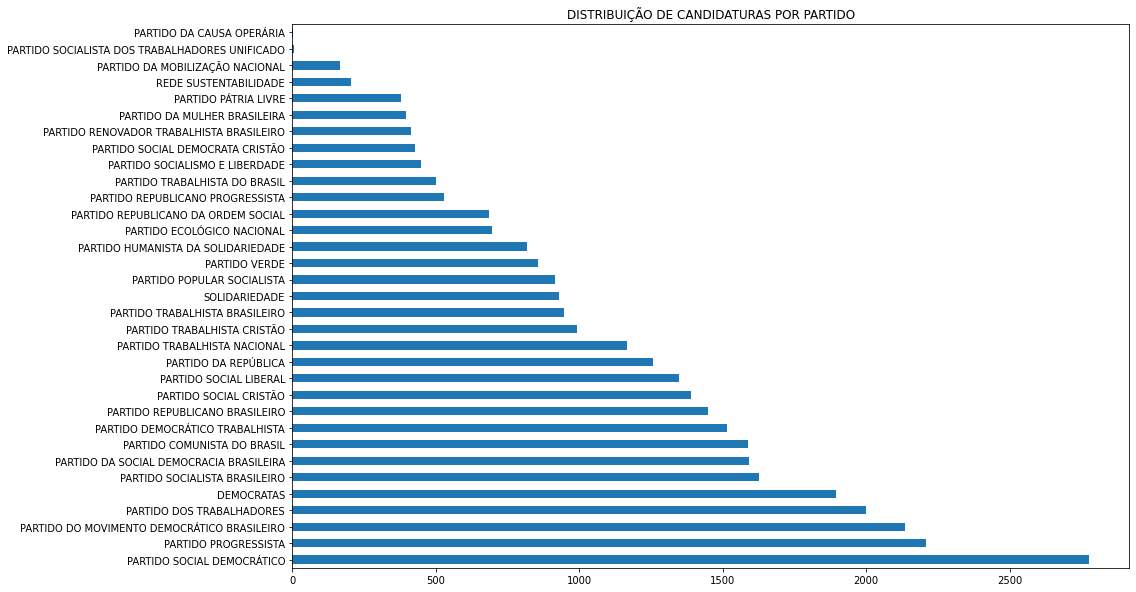

In [24]:
consulta_Vereador_2016['NM_PARTIDO'].value_counts().plot(kind='barh', title='DISTRIBUIÇÃO DE CANDIDATURAS POR PARTIDO',figsize=(15,10) )

In [13]:
consulta_Vereador_2016['NM_UE'].value_counts()

SALVADOR                1056
CAMAÇARI                 413
FEIRA DE SANTANA         413
ILHÉUS                   394
VITÓRIA DA CONQUISTA     386
                        ... 
ABAÍRA                    24
PRESIDENTE DUTRA          24
CAEM                      24
CORIBE                    24
PINTADAS                  22
Name: NM_UE, Length: 417, dtype: int64

In [16]:
#Distribuição de Gênero
consulta_Vereador_2016['DS_GENERO'].value_counts()*100/33894

MASCULINO    67.778958
FEMININO     33.324482
Name: DS_GENERO, dtype: float64

In [17]:
consulta_Vereador_2016['DS_GENERO'].value_counts()

MASCULINO    22973
FEMININO     11295
Name: DS_GENERO, dtype: int64

In [19]:
consulta_Vereador_2016['DS_COR_RACA'].value_counts()*100/33894

NEGRA       80.657343
BRANCA      19.808816
AMARELA      0.392400
INDÍGENA     0.244881
Name: DS_COR_RACA, dtype: float64

In [14]:
consulta_Vereador_2016['NR_IDADE_DATA_POSSE'].describe()

count    34268.000000
mean        43.808684
std         11.270744
min         18.000000
25%         36.000000
50%         43.000000
75%         51.000000
max         91.000000
Name: NR_IDADE_DATA_POSSE, dtype: float64

In [20]:
consulta_Vereador_2016['DS_GRAU_INSTRUCAO'].value_counts()*100/33894

ENSINO MÉDIO COMPLETO            44.692276
SUPERIOR COMPLETO                15.967428
ENSINO FUNDAMENTAL INCOMPLETO    15.073464
ENSINO FUNDAMENTAL COMPLETO      11.453355
ENSINO MÉDIO INCOMPLETO           6.313802
SUPERIOR INCOMPLETO               4.298696
LÊ E ESCREVE                      3.304420
Name: DS_GRAU_INSTRUCAO, dtype: float64

### Relação de Raca e Gênero com os partidos e unidade eleitorais: Como é a representatividade na Bahia?

O Partido com maior número de candidatas de ambos os sexos é o PARTIDO SOCIAL DEMOCRÁTICO e assim como o partido com menor candidatura, PARTIDO DA CAUSA OPERÁRIA.

Salvador é a unidade eleitoral com maior número de candidatos de ambos os sexo ao cargo de vereador, já PINTADAS é a unidade eleitoral com apenas 7  mulheres candidatas. ABAÍRA e PINTADAS são as unidades eleitoralis com o menor número de homens. Salvador tem a maioria dos candidatos de ambos os sexos declarados brancos e negros.

Quanto a candidatas, 77% são negras e em média tem 43 anos  . Já homens são a maioria negra, 81%, com  média de idade de 44 anos. Em ambos os sexos tem mais de 40% dos candidatos com ensino médio completo e em torno de 3% que apenas lê  escreve.


*feminino*

In [21]:
# Criando um novo Dataframe só com mulheres
fem = pd.DataFrame(consulta_Vereador_2016.loc[consulta_Vereador_2016['DS_GENERO'] == 'FEMININO'])

In [22]:
# Distribuição dos Partidos
fem['NM_PARTIDO'].value_counts()

PARTIDO SOCIAL DEMOCRÁTICO                        856
PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO       730
PARTIDO DOS TRABALHADORES                         715
PARTIDO PROGRESSISTA                              687
DEMOCRATAS                                        662
PARTIDO COMUNISTA DO BRASIL                       538
PARTIDO SOCIALISTA BRASILEIRO                     531
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA           530
PARTIDO REPUBLICANO BRASILEIRO                    493
PARTIDO DEMOCRÁTICO TRABALHISTA                   467
PARTIDO SOCIAL LIBERAL                            438
PARTIDO SOCIAL CRISTÃO                            436
PARTIDO DA REPÚBLICA                              424
PARTIDO TRABALHISTA NACIONAL                      389
PARTIDO TRABALHISTA CRISTÃO                       344
PARTIDO TRABALHISTA BRASILEIRO                    319
SOLIDARIEDADE                                     302
PARTIDO VERDE                                     279
PARTIDO POPULAR SOCIALISTA  

<AxesSubplot:title={'center':'DISTRIBUIÇÃO DE PARTIDOS POR GÊNERO - FEMININO'}>

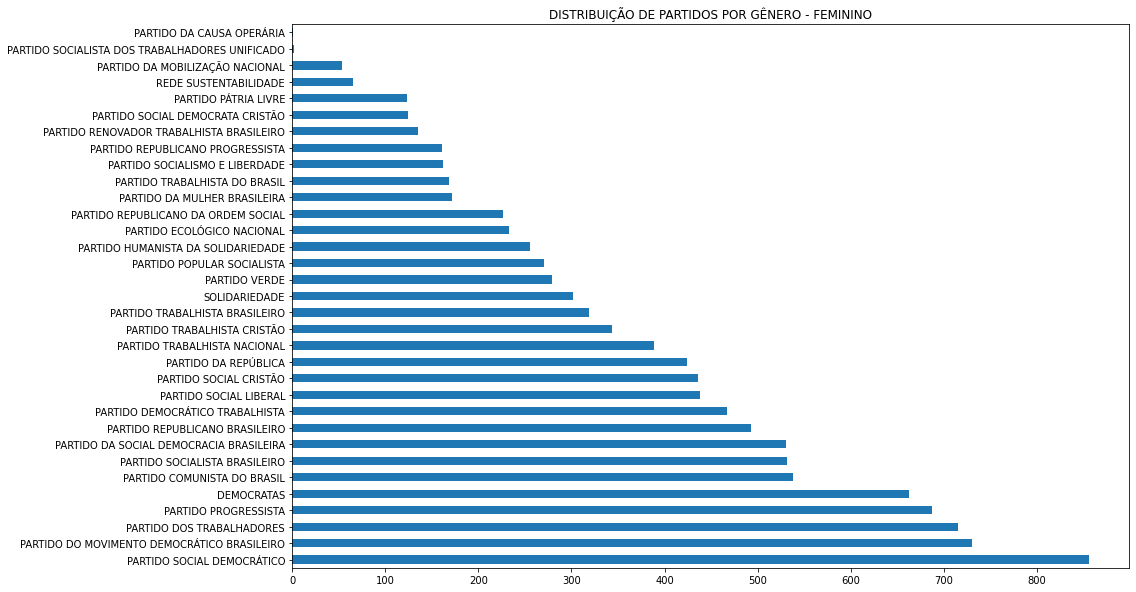

In [23]:
fem['NM_PARTIDO'].value_counts().plot(kind='barh', title= 'DISTRIBUIÇÃO DE PARTIDOS POR GÊNERO - FEMININO', figsize=(15,10))

In [25]:
# Distribuição por unidade eleitoral
fem['NM_UE'].value_counts()

SALVADOR                327
FEIRA DE SANTANA        133
CAMAÇARI                130
ITABUNA                 125
VITÓRIA DA CONQUISTA    123
                       ... 
DOM MACEDO COSTA          9
CAEM                      8
CORIBE                    8
PRESIDENTE DUTRA          8
PINTADAS                  7
Name: NM_UE, Length: 417, dtype: int64

In [26]:
# Distribuição racial
fem['DS_COR_RACA'].value_counts()*100/11295

NEGRA       76.688800
BRANCA      22.638336
AMARELA      0.478088
INDÍGENA     0.194776
Name: DS_COR_RACA, dtype: float64

In [28]:
fem['NR_IDADE_DATA_POSSE'].describe()

count    11295.000000
mean        42.782027
std         11.923786
min         18.000000
25%         34.000000
50%         42.000000
75%         51.000000
max         89.000000
Name: NR_IDADE_DATA_POSSE, dtype: float64

In [27]:
fem['DS_GRAU_INSTRUCAO'].value_counts()*100/11295

ENSINO MÉDIO COMPLETO            46.967685
SUPERIOR COMPLETO                21.106684
ENSINO FUNDAMENTAL INCOMPLETO     9.845064
ENSINO FUNDAMENTAL COMPLETO       8.154050
ENSINO MÉDIO INCOMPLETO           5.754759
SUPERIOR INCOMPLETO               5.241257
LÊ E ESCREVE                      2.930500
Name: DS_GRAU_INSTRUCAO, dtype: float64

In [29]:
fem.filter(items=['DS_GRAU_INSTRUCAO']).groupby(fem['DS_COR_RACA']).describe()

DS_GRAU_INSTRUCAO                                    
                        count unique                    top  freq
DS_COR_RACA                                                      
AMARELA                    54      7  ENSINO MÉDIO COMPLETO    25
BRANCA                   2557      7  ENSINO MÉDIO COMPLETO  1195
INDÍGENA                   22      6  ENSINO MÉDIO COMPLETO     7
NEGRA                    8662      7  ENSINO MÉDIO COMPLETO  4078

In [30]:
fem.filter(items=['NM_UE']).groupby(fem['DS_COR_RACA']).describe()

NM_UE                                 
            count unique                  top freq
DS_COR_RACA                                       
AMARELA        54     29               TUCANO   13
BRANCA       2557    393             SALVADOR   50
INDÍGENA       22     15  SANTA CRUZ CABRÁLIA    4
NEGRA        8662    416             SALVADOR  276

*Masculino*

In [31]:
#Criando DataFrame
masc = pd.DataFrame(consulta_Vereador_2016.loc[consulta_Vereador_2016['DS_GENERO'] == 'MASCULINO'])

In [32]:
# Distribuição dos Partidos
masc['NM_PARTIDO'].value_counts()

PARTIDO SOCIAL DEMOCRÁTICO                        1921
PARTIDO PROGRESSISTA                              1523
PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO       1406
PARTIDO DOS TRABALHADORES                         1283
DEMOCRATAS                                        1233
PARTIDO SOCIALISTA BRASILEIRO                     1096
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA           1061
PARTIDO COMUNISTA DO BRASIL                       1052
PARTIDO DEMOCRÁTICO TRABALHISTA                   1049
PARTIDO SOCIAL CRISTÃO                             955
PARTIDO REPUBLICANO BRASILEIRO                     955
PARTIDO SOCIAL LIBERAL                             911
PARTIDO DA REPÚBLICA                               832
PARTIDO TRABALHISTA NACIONAL                       777
PARTIDO TRABALHISTA CRISTÃO                        647
PARTIDO POPULAR SOCIALISTA                         647
PARTIDO TRABALHISTA BRASILEIRO                     629
SOLIDARIEDADE                                      628
PARTIDO VE

In [33]:
# Distribuição por unidade eleitoral
masc['NM_UE'].value_counts()

SALVADOR                729
CAMAÇARI                283
FEIRA DE SANTANA        280
ILHÉUS                  272
VITÓRIA DA CONQUISTA    263
                       ... 
PRESIDENTE DUTRA         16
CORIBE                   16
CATOLÂNDIA               16
ABAÍRA                   15
PINTADAS                 15
Name: NM_UE, Length: 417, dtype: int64

In [34]:
masc['DS_COR_RACA'].value_counts()*100/22973

NEGRA       81.295434
BRANCA      18.095155
AMARELA      0.343882
INDÍGENA     0.265529
Name: DS_COR_RACA, dtype: float64

In [38]:
masc['NR_IDADE_DATA_POSSE'].describe()

count    22973.000000
mean        44.313455
std         10.900241
min         18.000000
25%         36.000000
50%         44.000000
75%         52.000000
max         91.000000
Name: NR_IDADE_DATA_POSSE, dtype: float64

In [35]:
masc['DS_GRAU_INSTRUCAO'].value_counts()*100/22973

ENSINO MÉDIO COMPLETO            42.845950
ENSINO FUNDAMENTAL INCOMPLETO    17.398685
SUPERIOR COMPLETO                13.180690
ENSINO FUNDAMENTAL COMPLETO      12.889044
ENSINO MÉDIO INCOMPLETO           6.485875
SUPERIOR INCOMPLETO               3.765290
LÊ E ESCREVE                      3.434467
Name: DS_GRAU_INSTRUCAO, dtype: float64

In [36]:
masc.filter(items=['DS_GRAU_INSTRUCAO']).groupby(masc['DS_COR_RACA']).describe()

DS_GRAU_INSTRUCAO                                    
                        count unique                    top  freq
DS_COR_RACA                                                      
AMARELA                    79      7  ENSINO MÉDIO COMPLETO    39
BRANCA                   4157      7  ENSINO MÉDIO COMPLETO  1751
INDÍGENA                   61      7  ENSINO MÉDIO COMPLETO    18
NEGRA                   18676      7  ENSINO MÉDIO COMPLETO  8035

In [37]:
masc.filter(items=['NM_UE']).groupby(masc['DS_COR_RACA']).describe()

NM_UE                                 
             count unique                  top freq
DS_COR_RACA                                        
AMARELA         79     34               TUCANO   13
BRANCA        4157    396             SALVADOR  116
INDÍGENA        61     32  SANTA CRUZ CABRÁLIA    7
NEGRA        18676    417             SALVADOR  607

 #### RAÇA


In [39]:
# distribuição racial
consulta_Vereador_2016['DS_COR_RACA'].value_counts()*100/33894

NEGRA       80.657343
BRANCA      19.808816
AMARELA      0.392400
INDÍGENA     0.244881
Name: DS_COR_RACA, dtype: float64

In [40]:
# Criando novas colunas boleanas para raça
consulta_Vereador_2016['NEGRA'] = consulta_Vereador_2016['DS_COR_RACA'].str.contains('NEGRA')
consulta_Vereador_2016['BRANCA'] = consulta_Vereador_2016['DS_COR_RACA'].str.contains('BRANCA')
consulta_Vereador_2016['AMARELA'] = consulta_Vereador_2016['DS_COR_RACA'].str.contains('AMARELA')
consulta_Vereador_2016['INDÍGENA'] = consulta_Vereador_2016['DS_COR_RACA'].str.contains('INDÍGENA')


In [41]:
# Criando dataframes por raça 
raca_cor = consulta_Vereador_2016['DS_COR_RACA'].unique().tolist()
dfs = {}

for raca in raca_cor:
    selected_rows = consulta_Vereador_2016[consulta_Vereador_2016[raca] == True]
    dfs[f'df_{raca}'] = selected_rows
    print

In [42]:
df_NEGRA = pd.DataFrame(dfs['df_NEGRA'])
df_BRANCA = pd.DataFrame(dfs['df_BRANCA'])
df_AMARELA = pd.DataFrame(dfs['df_AMARELA'])
df_INDIGENA = pd.DataFrame(dfs['df_INDÍGENA'])

*Negros*

In [43]:
df_NEGRA['NM_UE'].describe()

count        27338
unique         417
top       SALVADOR
freq           883
Name: NM_UE, dtype: object

In [44]:
df_NEGRA['NM_UE'].min()

'ABARÉ'

In [45]:
df_NEGRA['NM_PARTIDO'].describe()

count                          27338
unique                            33
top       PARTIDO SOCIAL DEMOCRÁTICO
freq                            2128
Name: NM_PARTIDO, dtype: object

In [46]:
df_NEGRA['NM_PARTIDO'].min()

'DEMOCRATAS'

*Branco*

In [47]:
df_BRANCA['NM_UE'].describe()

count         6714
unique         408
top       SALVADOR
freq           166
Name: NM_UE, dtype: object

In [48]:
df_BRANCA['NM_UE'].min()

'ABARÉ'

In [49]:
df_BRANCA['NM_PARTIDO'].describe()

count                           6714
unique                            33
top       PARTIDO SOCIAL DEMOCRÁTICO
freq                             627
Name: NM_PARTIDO, dtype: object

In [50]:
df_BRANCA['NM_PARTIDO'].min()

'DEMOCRATAS'

*Amarelos e Indigenas* 

In [51]:
df_AMARELA['NM_UE'].describe()

count        133
unique        49
top       TUCANO
freq          26
Name: NM_UE, dtype: object

In [52]:
df_AMARELA['NM_PARTIDO'].describe()

count                            133
unique                            27
top       PARTIDO SOCIAL DEMOCRÁTICO
freq                              13
Name: NM_PARTIDO, dtype: object

In [53]:
df_INDIGENA['NM_UE'].describe()

count                      83
unique                     39
top       SANTA CRUZ CABRÁLIA
freq                       11
Name: NM_UE, dtype: object

In [54]:
df_INDIGENA['NM_PARTIDO'].describe()

count                                  83
unique                                 24
top       PARTIDO DEMOCRÁTICO TRABALHISTA
freq                                    9
Name: NM_PARTIDO, dtype: object

 - GRAU DE INSTRUÇÃO

In [55]:
consulta_Vereador_2016.filter(items=['NM_UE']).groupby(consulta_Vereador_2016['DS_GRAU_INSTRUCAO']).describe()

NM_UE                                  
                               count unique                   top freq
DS_GRAU_INSTRUCAO                                                     
ENSINO FUNDAMENTAL COMPLETO     3882    412              SALVADOR   69
ENSINO FUNDAMENTAL INCOMPLETO   5109    416  VITÓRIA DA CONQUISTA   46
ENSINO MÉDIO COMPLETO          15148    417              SALVADOR  396
ENSINO MÉDIO INCOMPLETO         2140    371              SALVADOR   58
LÊ E ESCREVE                    1120    272         SÍTIO DO MATO   41
SUPERIOR COMPLETO               5412    417              SALVADOR  383
SUPERIOR INCOMPLETO             1457    331              SALVADOR  110

In [56]:
consulta_Vereador_2016.filter(items=['NM_PARTIDO']).groupby(consulta_Vereador_2016['DS_GRAU_INSTRUCAO']).describe()

NM_PARTIDO                                     \
                                   count unique                         top   
DS_GRAU_INSTRUCAO                                                             
ENSINO FUNDAMENTAL COMPLETO         3882     31  PARTIDO SOCIAL DEMOCRÁTICO   
ENSINO FUNDAMENTAL INCOMPLETO       5109     31  PARTIDO SOCIAL DEMOCRÁTICO   
ENSINO MÉDIO COMPLETO              15148     33  PARTIDO SOCIAL DEMOCRÁTICO   
ENSINO MÉDIO INCOMPLETO             2140     31  PARTIDO SOCIAL DEMOCRÁTICO   
LÊ E ESCREVE                        1120     31  PARTIDO SOCIAL DEMOCRÁTICO   
SUPERIOR COMPLETO                   5412     33   PARTIDO DOS TRABALHADORES   
SUPERIOR INCOMPLETO                 1457     32   PARTIDO DOS TRABALHADORES   

                                     
                               freq  
DS_GRAU_INSTRUCAO                    
ENSINO FUNDAMENTAL COMPLETO     328  
ENSINO FUNDAMENTAL INCOMPLETO   450  
ENSINO MÉDIO COMPLETO          1227  
ENSINO MÉDIO INCOMPLETO         162  
LÊ E ESCREVE                     95  
SUPERIOR COMPLETO               424  
SUPERIOR INCOMPLETO             142

### Criando DataFrame
 


*Partido*

In [58]:
# Variaveis de Gênero 
fem_partido = fem['NM_PARTIDO'].value_counts()
masc_partido = masc['NM_PARTIDO'].value_counts()


In [59]:
total_gen_partido = fem_partido + masc_partido

In [60]:
percent_fem_partido = fem_partido * 100/total_gen_partido
percent_masc_partido = masc_partido * 100/total_gen_partido

In [61]:
percent_masc_partido = percent_masc_partido.apply(lambda x: round(x, decimais))
percent_fem_partido = percent_fem_partido.apply(lambda x: round(x, decimais))

In [62]:
# Variaveis de raça
negra = df_NEGRA['NM_PARTIDO'].value_counts()
branca = df_BRANCA['NM_PARTIDO'].value_counts()
amarela = df_AMARELA['NM_PARTIDO'].value_counts()
indigena = df_INDIGENA['NM_PARTIDO'].value_counts()

In [64]:
total_raca_partido = consulta_Vereador_2016['NM_PARTIDO'].value_counts()

In [65]:
percent_negra = negra *100/total_raca_partido
percent_branca = branca *100/total_raca_partido
percent_amarela = amarela *100/total_raca_partido
percent_indigena = indigena *100/total_raca_partido

In [66]:
percent_negra = percent_negra.apply(lambda x: round(x, decimais))
percent_branca = percent_branca.apply(lambda x: round(x, decimais))
percent_amarela = percent_amarela.apply(lambda x: round(x, decimais))
percent_indigena = percent_indigena.apply(lambda x: round(x, decimais))

In [67]:
# Variaveis de Grau de instrucao

ens_Med = consulta_Vereador_2016.loc[(consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO COMPLETO') + (consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO INCOMPLETO')]
ens_Fund = consulta_Vereador_2016.loc[(consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'ENSINO FUNDAMENTAL COMPLETO') + (consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'ENSINO FUNDAMENTAL INCOMPLETO')]
ens_Sup = consulta_Vereador_2016.loc[(consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'SUPERIOR COMPLETO') + (consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'SUPERIOR INCOMPLETO')]
ens_Le = consulta_Vereador_2016.loc[consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'LÊ E ESCREVE']


In [68]:
fundamental = ens_Fund['NM_PARTIDO'].value_counts() 
medio = ens_Med['NM_PARTIDO'].value_counts() 
superior = ens_Sup['NM_PARTIDO'].value_counts() 
le_escreve = ens_Le['NM_PARTIDO'].value_counts()

In [69]:
total_ens_partido = consulta_Vereador_2016['NM_PARTIDO'].value_counts() 

In [70]:
percent_ens_Med = medio*100/total_ens_partido
percent_ens_Fund = fundamental*100/total_ens_partido
percent_ens_Sup = superior*100/total_ens_partido 
percent_ens_Le = le_escreve*100/total_ens_partido


In [71]:
percent_ens_Med= percent_ens_Med.apply(lambda x: round(x, decimais))
percent_ens_Fund= percent_ens_Fund.apply(lambda x: round(x, decimais))
percent_ens_Sup = percent_ens_Sup.apply(lambda x: round(x, decimais))
percent_ens_Le = percent_ens_Le.apply(lambda x: round(x, decimais))


In [72]:
# Criando Data Frame 

dic1 = {'FEMININO': fem_partido, '%FEMININO': percent_fem_partido , 'MASCULINO':masc_partido,'%MASCULINO': percent_masc_partido ,
          'BRANCA': branca , '%BRANCA': percent_branca , 'NEGRA': negra, '%NEGRA': percent_negra, 'AMARELA': amarela, '%AMARELA': percent_amarela, 
         'INDÍGENA': indigena ,'%INDÍGENA': percent_indigena, 'ENSINO MÉDIO': medio ,'%ENSINO MÉDIO': percent_ens_Med , 'ENSINO FUNDAMENTAL': fundamental, '%ENSINO FUNDAMENTAL': percent_ens_Fund,
          'ENSINO SUPERIOR': superior, '%ENSINO SUPERIOR': percent_ens_Sup, 'LÊ E ESCREVE': le_escreve, '%LÊ E ESCREVE':percent_ens_Le
       }


In [73]:
df_partidos = pd.DataFrame(dic1)

In [74]:
df_partidos = df_partidos.fillna(0)

In [76]:
df_partidos.to_csv('consultaVereador_BA_partidos.csv')

In [75]:
df_partidos

,FEMININO,%FEMININO,MASCULINO,%MASCULINO,BRANCA,%BRANCA,NEGRA,%NEGRA,AMARELA,%AMARELA,INDÍGENA,%INDÍGENA,ENSINO MÉDIO,%ENSINO MÉDIO,ENSINO FUNDAMENTAL,%ENSINO FUNDAMENTAL,ENSINO SUPERIOR,%ENSINO SUPERIOR,LÊ E ESCREVE,%LÊ E ESCREVE
DEMOCRATAS,662,34.9,1233,65.1,439,23.2,1449,76.5,4.0,0.2,3.0,0.2,950,50.1,499.0,26.3,359,18.9,87.0,4.6
PARTIDO COMUNISTA DO BRASIL,538,33.8,1052,66.2,308,19.4,1266,79.6,10.0,0.6,6.0,0.4,754,47.4,410.0,25.8,366,23.0,60.0,3.8
PARTIDO DA CAUSA OPERÁRIA,1,33.3,2,66.7,1,33.3,2,66.7,0.0,0.0,0.0,0.0,2,66.7,0.0,0.0,1,33.3,0.0,0.0
PARTIDO DA MOBILIZAÇÃO NACIONAL,54,32.3,113,67.7,24,14.4,140,83.8,2.0,1.2,1.0,0.6,84,50.3,37.0,22.2,41,24.6,5.0,3.0
PARTIDO DA MULHER BRASILEIRA,172,43.3,225,56.7,52,13.1,344,86.6,1.0,0.3,0.0,0.0,217,54.7,94.0,23.7,77,19.4,9.0,2.3
PARTIDO DA REPÚBLICA,424,33.8,832,66.2,270,21.5,979,77.9,4.0,0.3,3.0,0.2,626,49.8,391.0,31.1,200,15.9,39.0,3.1
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,530,33.3,1061,66.7,376,23.6,1204,75.7,5.0,0.3,6.0,0.4,786,49.4,405.0,25.5,350,22.0,50.0,3.1
PARTIDO DEMOCRÁTICO TRABALHISTA,467,30.8,1049,69.2,275,18.1,1230,81.1,2.0,0.1,9.0,0.6,715,47.2,432.0,28.5,310,20.4,59.0,3.9
PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,730,34.2,1406,65.8,459,21.5,1658,77.6,10.0,0.5,9.0,0.4,1023,47.9,621.0,29.1,431,20.2,61.0,2.9
PARTIDO DOS TRABALHADORES,715,35.8,1283,64.2,403,20.2,1582,79.2,6.0,0.3,7.0,0.4,964,48.2,410.0,20.5,566,28.3,58.0,2.9


*Unidade Eleitoral*

In [78]:
# Variaveis de Gênero 
fem_ue = fem['NM_UE'].value_counts()
masc_ue = masc['NM_UE'].value_counts()


In [79]:
total_gen_ue = fem_ue + masc_ue

In [81]:
percent_fem_ue = fem_ue * 100/total_gen_ue
percent_masc_ue = masc_ue * 100/total_gen_ue

In [83]:
percent_masc_ue = percent_masc_ue.apply(lambda x: round(x, decimais))
percent_fem_ue = percent_fem_ue.apply(lambda x: round(x, decimais))

In [84]:
# Variaveis de raça
negra_ue = df_NEGRA['NM_UE'].value_counts()
branca_ue = df_BRANCA['NM_UE'].value_counts()
amarela_ue = df_AMARELA['NM_UE'].value_counts()
indigena_ue = df_INDIGENA['NM_UE'].value_counts()

In [85]:
total_raca_ue = consulta_Vereador_2016['NM_UE'].value_counts()

In [86]:
percent_negra_ue = negra_ue *100/total_raca_ue
percent_branca_ue = branca_ue *100/total_raca_ue
percent_amarela_ue = amarela_ue *100/total_raca_ue
percent_indigena_ue = indigena_ue *100/total_raca_ue

In [87]:
percent_negra_ue = percent_negra_ue.apply(lambda x: round(x, decimais))
percent_branca_ue = percent_branca_ue.apply(lambda x: round(x, decimais))
percent_amarela_ue = percent_amarela_ue.apply(lambda x: round(x, decimais))
percent_indigena_ue = percent_indigena_ue.apply(lambda x: round(x, decimais))

In [88]:
# Variaveis de Grau de instrucao

ens_Med_UE = ens_Med['NM_UE'].value_counts()
ens_Fund_UE = ens_Fund['NM_UE'].value_counts()
ens_Sup_UE = ens_Sup['NM_UE'].value_counts()
ens_Le_UE = ens_Le['NM_UE'].value_counts()


In [89]:
total_ens_ue = consulta_Vereador_2016['NM_UE'].value_counts()

In [90]:
percent_ens_Med_UE = ens_Med_UE *100/total_ens_ue
percent_ens_Fund_UE = ens_Fund_UE *100/total_ens_ue
percent_ens_Sup_UE = ens_Sup_UE *100/total_ens_ue
percent_ens_Le_UE = ens_Le_UE*100/total_ens_ue


In [91]:
percent_ens_Med_UE= percent_ens_Med_UE.apply(lambda x: round(x, decimais))
percent_ens_Fund_UE= percent_ens_Fund_UE.apply(lambda x: round(x, decimais))
percent_ens_Sup_UE =percent_ens_Sup_UE.apply(lambda x: round(x, decimais))
percent_ens_Le_UE = percent_ens_Le_UE.apply(lambda x: round(x, decimais))


In [92]:
# Criando Data Frame 

dic2 = {'FEMININO': fem_ue, '%FEMININO': percent_fem_ue , 'MASCULINO':masc_ue,'%MASCULINO': percent_masc_ue ,
          'BRANCA': branca_ue , '%BRANCA': percent_branca_ue , 'NEGRA': negra_ue, '%NEGRA': percent_negra_ue, 'AMARELA': amarela_ue, '%AMARELA': percent_amarela_ue, 
         'INDÍGENA': indigena_ue ,'%INDÍGENA': percent_indigena_ue, 'ENSINO MÉDIO': ens_Med_UE ,'%ENSINO MÉDIO': percent_ens_Med_UE , 
          'ENSINO FUNDAMENTAL': ens_Fund_UE, '%ENSINO FUNDAMENTAL': percent_ens_Fund_UE,
          'ENSINO SUPERIOR': ens_Sup_UE, '%ENSINO SUPERIOR': percent_ens_Sup_UE, 'LÊ E ESCREVE': ens_Le_UE, '%LÊ E ESCREVE':percent_ens_Le_UE}


In [93]:
df_ue = pd.DataFrame(dic2)

In [94]:
df_ue = df_ue.fillna(0)

In [95]:
df_ue

,FEMININO,%FEMININO,MASCULINO,%MASCULINO,BRANCA,%BRANCA,NEGRA,%NEGRA,AMARELA,%AMARELA,INDÍGENA,%INDÍGENA,ENSINO MÉDIO,%ENSINO MÉDIO,ENSINO FUNDAMENTAL,%ENSINO FUNDAMENTAL,ENSINO SUPERIOR,%ENSINO SUPERIOR,LÊ E ESCREVE,%LÊ E ESCREVE
ABARÉ,14,32.6,29,67.4,6.0,14.0,34,79.1,1.0,2.3,2.0,4.7,18,41.9,11,25.6,14,32.6,0.0,0.0
ABAÍRA,9,37.5,15,62.5,10.0,41.7,10,41.7,4.0,16.7,0.0,0.0,13,54.2,6,25.0,2,8.3,3.0,12.5
ACAJUTIBA,34,37.8,56,62.2,6.0,6.7,84,93.3,0.0,0.0,0.0,0.0,60,66.7,18,20.0,12,13.3,0.0,0.0
ADUSTINA,15,31.9,32,68.1,24.0,51.1,23,48.9,0.0,0.0,0.0,0.0,24,51.1,14,29.8,5,10.6,4.0,8.5
AIQUARA,13,32.5,27,67.5,4.0,10.0,36,90.0,0.0,0.0,0.0,0.0,22,55.0,13,32.5,5,12.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WANDERLEY,13,35.1,24,64.9,13.0,35.1,24,64.9,0.0,0.0,0.0,0.0,16,43.2,11,29.7,9,24.3,1.0,2.7
WENCESLAU GUIMARÃES,37,34.3,71,65.7,5.0,4.6,103,95.4,0.0,0.0,0.0,0.0,70,64.8,24,22.2,14,13.0,0.0,0.0
XIQUE-XIQUE,16,29.1,39,70.9,5.0,9.1,50,90.9,0.0,0.0,0.0,0.0,27,49.1,9,16.4,15,27.3,4.0,7.3
ÁGUA FRIA,32,33.7,63,66.3,4.0,4.2,91,95.8,0.0,0.0,0.0,0.0,38,40.0,38,40.0,15,15.8,4.0,4.2


In [96]:
df_ue.to_csv('consultaVereador_BA_municipios.csv')